In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import json
import pandas as pd
import funciones_movimientos as fm #Funciones customizadas
import psycopg2
conn = psycopg2.connect("host='postgre-sqltest.cpdeokpzufj1.us-west-2.rds.amazonaws.com' port=5432 dbname='postgres' user=xseed password=LosTilos114")
crs = {'init': 'epsg:4326'}
rcParams['figure.figsize'] = 8, 6
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.despine()
sns.set_style("white")

<Figure size 576x432 with 0 Axes>

# Gráficos de salidas por hora para ver picos de uso

Se divide la informacion entre dias de semana y fines de semana ya que tienen un comportamiento diferente. Se hace un promedio.

In [101]:
query = '''
select extract(hour from unplug_hourtime) as hora, count(*) / 474 as cantidad from bike_movement
where user_type_code in (0,1, 2) and extract(dow from unplug_hourtime) not in (0,6)
group by extract(hour from unplug_hourtime)
'''

query2 = '''
select extract(hour from unplug_hourtime) as hora, count(*)/ 189 as cantidad from bike_movement
where user_type_code in (0,1, 2) and extract(dow from unplug_hourtime) in (0,6)
group by extract(hour from unplug_hourtime)
'''

data_laboral = pd.read_sql(query, conn)
data_fines_de_semana = pd.read_sql(query2, conn)

data = data_laboral.merge(data_fines_de_semana, on=['hora'])
data.columns = ['Hora', 'Semana', 'Fin de semana']
data = pd.melt(data, id_vars =['Hora'])
data.columns = ['Hora', 'Periodo', 'Cantidad']

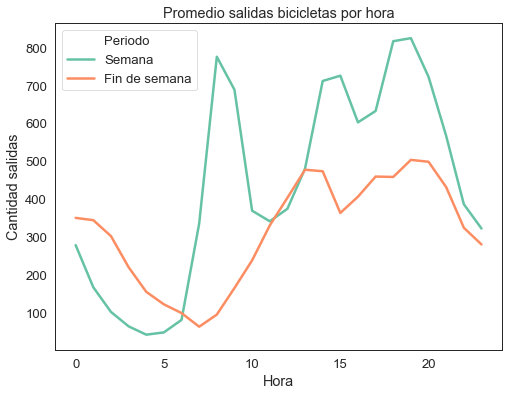

In [102]:
out = sns.lineplot(x='Hora', y ='Cantidad', hue="Periodo" , data=data, palette="Set2")
plt.xlabel('Hora')
plt.ylabel('Cantidad salidas')
plt.title('Promedio salidas bicicletas por hora') 
plt.show()

# Distribución de las duraciones de los viajes

In [88]:
query = '''
Select (travel_time / 60)::integer as Minutos, count(*) as cantidad from  bike_movement bm
where bm.user_type_code in (2)
group by travel_time / 60
'''

data_duracion = pd.read_sql(query, conn)

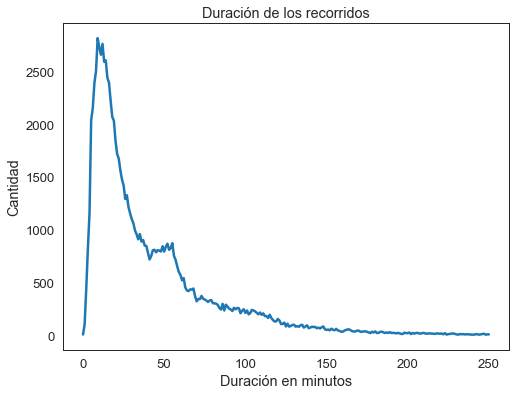

In [89]:
data_duracion = data_duracion[data_duracion.minutos <= 250]
out = sns.lineplot(x='minutos', y ='cantidad' , data=data_duracion, palette="Set2")
plt.xlabel('Duración en minutos')
plt.ylabel('Cantidad')
plt.title('Duración de los recorridos') 
plt.show()

In [92]:
data_duracion[(data_duracion.minutos <= 60)].cantidad.sum()

79308

In [93]:
data_duracion.cantidad.sum()

100974

# Distancias de los viajes

In [113]:
datos = pd.read_csv("Consultas BD/distancias.csv", sep="\t", encoding = 'UTF-8')

Intervalo      object
Cantidad        int64
Proporcion    float64
dtype: object

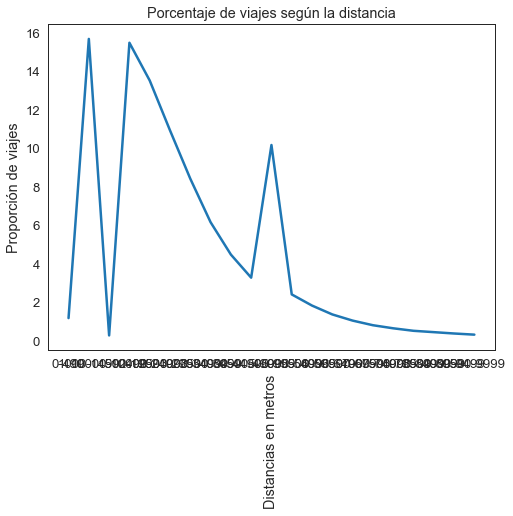

In [115]:

out = sns.lineplot(x='Intervalo', y ='Proporcion' , data=datos, palette="Set2")
plt.xlabel('Distancias en metros')
plt.ylabel('Proporción de viajes')
plt.title('Porcentaje de viajes según la distancia') 
plt.show()